### Imports

In [87]:
import sys
import numpy as np
from math import sin, cos, atan2, pi

import pyvista as pv
from pyvista import examples
from pyvista import set_plot_theme
set_plot_theme('document')

import plotly.graph_objects as go

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


import open3d as o3d

## Creating Data

I have generated two kinds of random data. For a small number of desired points I have generated randomized spiral of point clouds. And for a larger number of points I have generated points within a cube. Each row contains coordinates of a point in the order **X, Y, Z** in the range **[0, 1]**

The low number of points data has been visualized in `matplotlib` and `plotly` and the large number of data points have been visualized using `pyVista` and `Open3D` because they are more efficient in terms of handling larger data.

In [71]:
def generateData(numPoints, angle, shift):
    
    aboutZ = np.array([[cos(angle[2]), sin(angle[2]), 0], 
                  [-sin(angle[2]), cos(angle[2]), 0],
                  [0, 0, 1]])
    aboutY = np.array([[cos(angle[1]), 0, sin(angle[1])],
                  [0, 1, 0] ,
                  [-sin(angle[1]), 0, cos(angle[1])]])
    aboutX = np.array([[1, 0, 0],
                      [0, cos(angle[0]), sin(angle[0])],
                      [0, -sin(angle[0]), cos(angle[0])]])
      
    T = shift
    R = aboutZ.dot(aboutY.dot(aboutX))
    sourceData = np.random.rand(numPoints, 3)
    movedData = sourceData.dot(R) + shift.T
    return sourceData, movedData

In [72]:
def generateSpiral(numPoints, angle, shift):
    
    aboutZ = np.array([[cos(angle[2]), sin(angle[2]), 0], 
                  [-sin(angle[2]), cos(angle[2]), 0],
                  [0, 0, 1]])
    aboutY = np.array([[cos(angle[1]), 0, sin(angle[1])],
                  [0, 1, 0] ,
                  [-sin(angle[1]), 0, cos(angle[1])]])
    aboutX = np.array([[1, 0, 0],
                      [0, cos(angle[0]), sin(angle[0])],
                      [0, -sin(angle[0]), cos(angle[0])]])
      
    T = shift
    R = aboutZ.dot(aboutY.dot(aboutX))
    sourceData = np.zeros((numPoints, 3))
    sourceData[:, 0] = range(0, numPoints)
    sourceData[:, 1] = 0.2 * sourceData[:, 0] * np.sin(0.5 * sourceData[:, 0]) 
    sourceData[:, 2] = 0.2 * sourceData[:, 0] * np.cos(0.5 * sourceData[:, 0]) 
    
    movedData = sourceData.dot(R) + shift.T
    return sourceData, movedData

## Plotting The Point Clouds

#### PyVista

PyVista (formerly vtki) is a helper module for the Visualization Toolkit (VTK) that takes a different approach on interfacing with VTK through NumPy and direct array access.

Now that you have a NumPy array of points/vertices either from our sample
data or your own project, creating a PyVista mesh of those points is simply:

In [73]:
shift =  np.array([[-2], [2], [5]])
Xangle = pi/7
Yangle = pi/4
Zangle = pi/2
angle =  np.array([Xangle, Yangle, Zangle])
movedData, sourceData = generateData(10000, angle, shift)

In [74]:
sourceCloud = pv.PolyData(sourceData)
destinationCloud = pv.PolyData(movedData)

Now, one can easily add NumPy data arrays that have a length equal to the number of points in the mesh along the
first axis. I have used this feature to colour the points by their Z values and hence indicate elevation along the Z axis.

In [75]:
# Create the data array using z-component of points array  and add it to the point cloud as "elevation"
Zsource = sourceData[:,-1]
sourceCloud["elevation"] = Zsource

Zmoved = movedData[:,-1]
destinationCloud["elevation"] = Zmoved

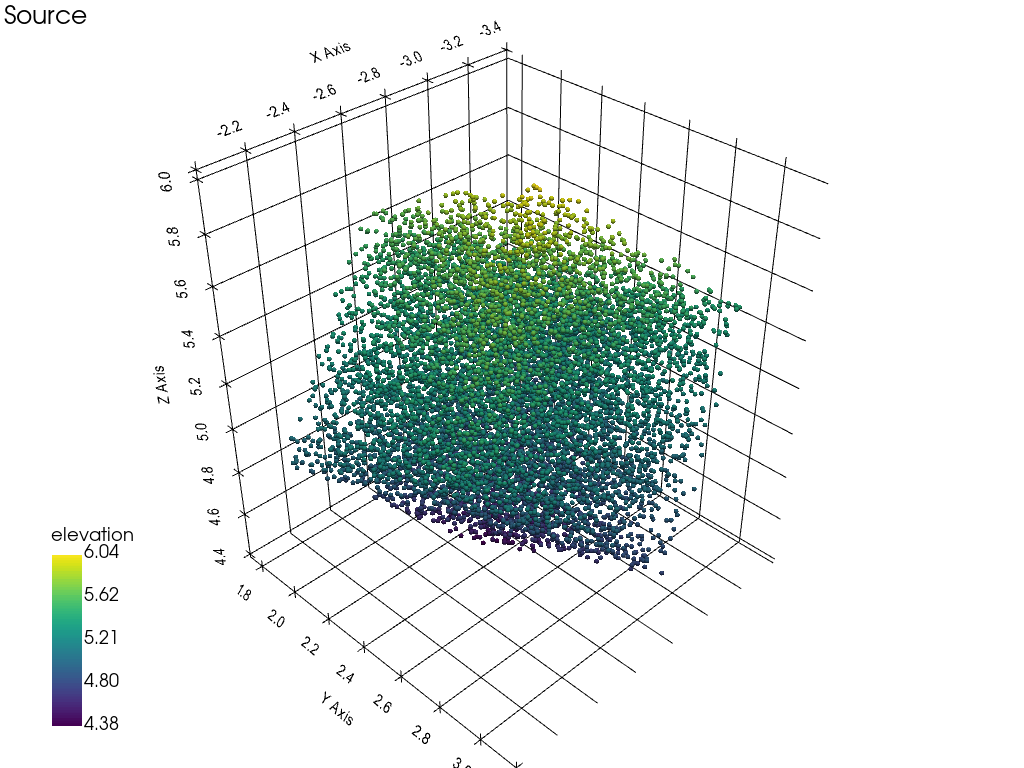

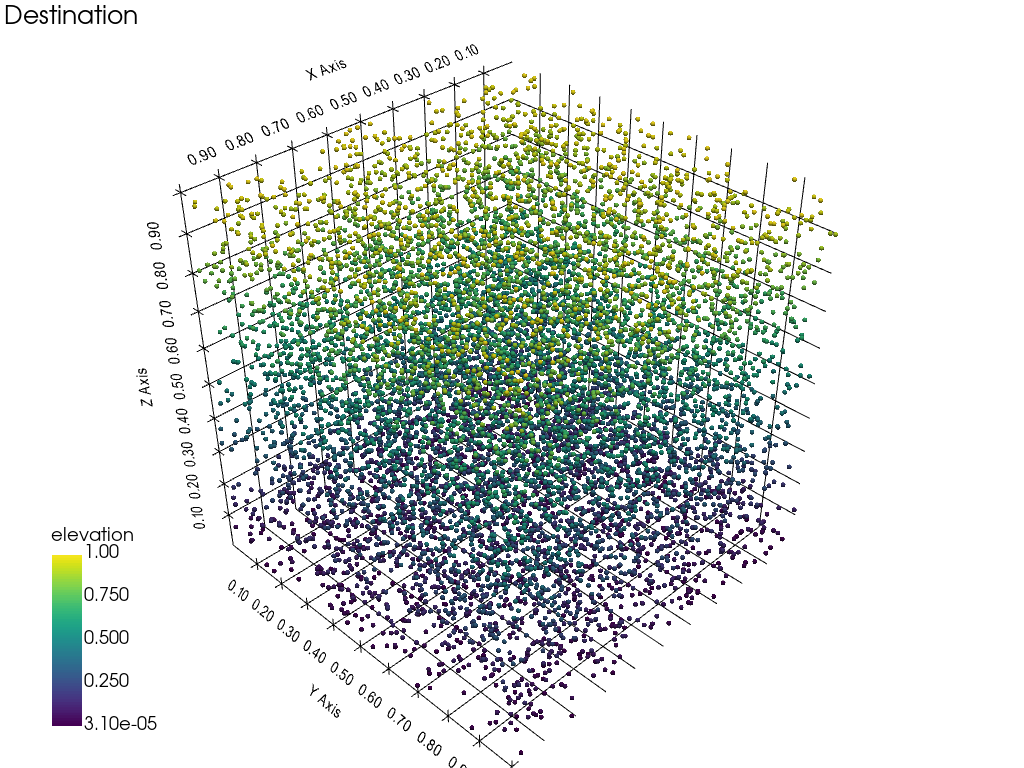

In [76]:
plotter = pv.Plotter()
sargs = dict(height=0.25, vertical=True, position_x=0.05, position_y=0.05)
plotter.add_text("Source", font_size=10)
plotter.add_mesh(sourceCloud, 
                 point_size = 5,
                 render_points_as_spheres = True,
                 scalar_bar_args=sargs)
plotter.show_grid()
plotter.show()

plotter = pv.Plotter()
plotter.add_text("Destination", font_size=10)
plotter.add_mesh(destinationCloud, 
                 point_size = 5,
                 render_points_as_spheres = True,
                 scalar_bar_args=sargs)
plotter.show_grid()
plotter.show()

In [77]:
shift =  np.array([[-2], [2], [5]])
Xangle = pi/7
Yangle = pi/4
Zangle = pi/2
angle =  np.array([Xangle, Yangle, Zangle])
movedData, sourceData = generateData(10000, angle, shift)
sourceCloud = pv.PolyData(sourceData)
destinationCloud = pv.PolyData(movedData)

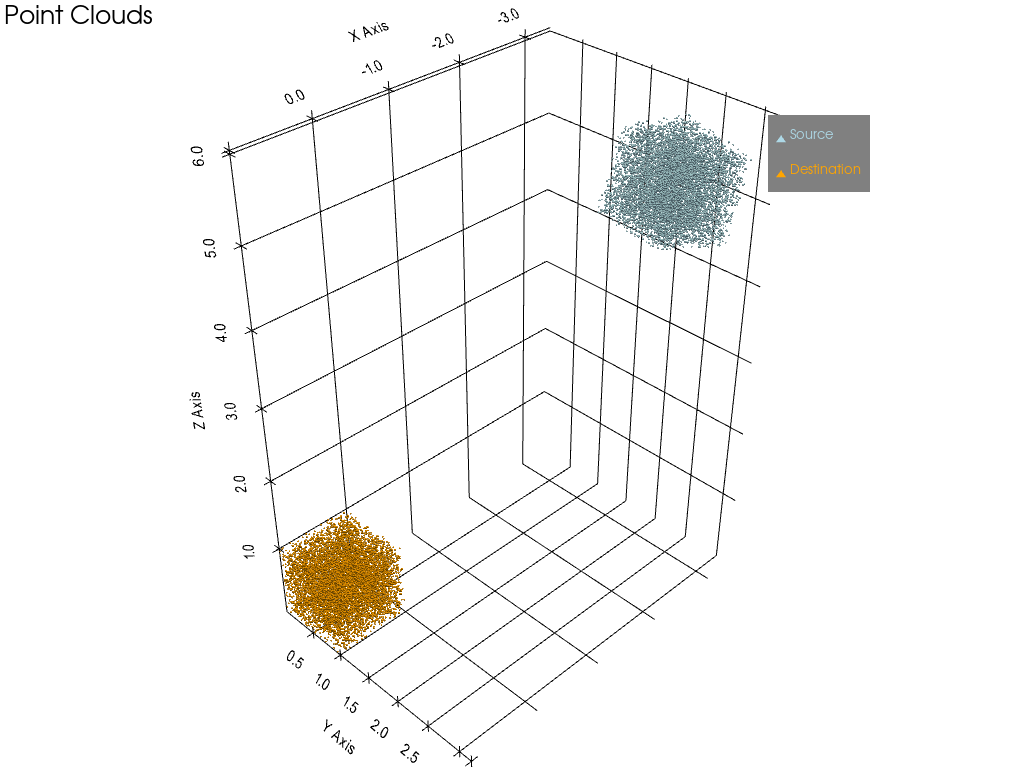

In [78]:
plotter = pv.Plotter()
sargs = dict(height=0.25, vertical=True, position_x=0.05, position_y=0.05)
plotter.add_text("Point Clouds", font_size=10)
plotter.add_mesh(sourceCloud, 
                 color='lightblue',
                 point_size = 2,
                 render_points_as_spheres = True,
                 scalar_bar_args=sargs,
                 label = 'Source')

plotter.add_mesh(destinationCloud, 
                 color='orange',
                 point_size = 2,
                 render_points_as_spheres = True,
                 scalar_bar_args=sargs,
                 label='Destination')
plotter.show_grid()
plotter.add_legend(size = (0.1, 0.1))
plotter.show()

#### Plotly

Plotly helps you view data in interactive plots and hence I used that to show the spiral point cloud data!

In [79]:
def plotData(data1, data2, label1, label2):
    fig = go.Figure()
   

    # Data for three-dimensional scattered points
    xdata1 = data1[:, 0]
    ydata1 = data1[:, 1]
    zdata1 = data1[:, 2]

    fig.add_trace(go.Scatter3d(x = xdata1, y = ydata1, z = zdata1,
                                       mode='markers',
                                       marker=dict(
                                        size=5,
                                        opacity=0.8
                                       ),
                                       name=label1
                              ))

    
    xdata2 = data2[:, 0]
    ydata2 = data2[:, 1]
    zdata2 = data2[:, 2]
    fig.add_trace(go.Scatter3d(x = xdata2, y = ydata2, z = zdata2,
                                       mode='markers',
                                       marker=dict(
                                        size=5,
                                        opacity=0.8
                                       ),
                                       name=label2
                              ))
    
    fig.update_layout(
        title="Generated Point Clouds",
        scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200, 230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230, 200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
    )
    fig.show()

In [80]:
shift =  np.array([[-2], [2], [5]])
Xangle = pi/7
Yangle = pi/4
Zangle = pi/2
angle =  np.array([Xangle, Yangle, Zangle])
movedData, sourceData = generateSpiral(10, angle, shift)
plotData(sourceData, movedData, "Source data", "Moved data")

#### Matplotlib

In [81]:
def matplotData(data1, data2, label1, label2):
    plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')

    # Data for a three-dimensional line
    xline1 = data1[:, 0]
    yline1 = data1[:, 1]
    zline1 = data1[:, 2]
    ax.plot3D(xline1, yline1, zline1, 'gray')

    # Data for three-dimensional scattered points
    xdata1 = data1[:, 0]
    ydata1 = data1[:, 1]
    zdata1 = data1[:, 2]
    ax.scatter3D(xdata1, ydata1, zdata1, label=label1);
    
    # Data for a three-dimensional line
    xline2 = data2[:, 0]
    yline2 = data2[:, 1]
    zline2 = data2[:, 2]
    ax.plot3D(xline2, yline2, zline2, 'gray')

    # Data for three-dimensional scattered points
    xdata2 = data2[:, 0]
    ydata2 = data2[:, 1]
    zdata2 = data2[:, 2]
    ax.scatter3D(xdata2, ydata2, zdata2, label=label2);
    plt.legend()

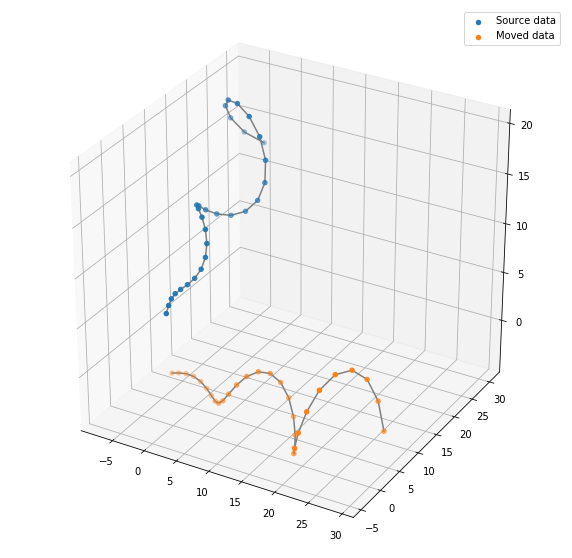

In [82]:
shift =  np.array([[-2], [2], [5]])
Xangle = pi/7
Yangle = pi/4
Zangle = pi/2
angle =  np.array([Xangle, Yangle, Zangle])
movedData, sourceData = generateSpiral(30, angle, shift)
matplotData(sourceData, movedData, "Source data", "Moved data")

#### Open3D

In [101]:
shift =  np.array([[-2], [2], [5]])
Xangle = pi/7
Yangle = pi/4
Zangle = pi/2
angle =  np.array([Xangle, Yangle, Zangle])
movedData, sourceData = generateData(10000, angle, shift)

In [102]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(sourceData)
o3d.io.write_point_cloud("ply/source.ply", pcd)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(movedData)
o3d.io.write_point_cloud("ply/destination.ply", pcd)

True

In [112]:
sourceload = o3d.io.read_point_cloud("ply/source.ply")
sourcePoints = np.asarray(sourceload.points)

destinationload = o3d.io.read_point_cloud("ply/destination.ply")
destPoints = np.asarray(destinationload.points)
mesh_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(
        size = 1, origin=[0, 0, 0])
o3d.visualization.draw_geometries([sourceload, destinationload, mesh_frame])